In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #built on matplot
import colorcet as cc

import matplotlib.pyplot as plt #basic visualization
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0) 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_weather = pd.read_csv('daily_weather_London.csv')

In [3]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    425 non-null    object 
 1   temperature  425 non-null    float64
 2   description  425 non-null    object 
dtypes: float64(1), object(2)
memory usage: 10.1+ KB


In [4]:
df_weather

,timestamp,temperature,description
0,2020-02-01,9.9,Passing clouds
1,2020-02-02,10.7,Partly sunny
2,2020-02-03,8.8,Clear
3,2020-02-04,6.9,Passing clouds
4,2020-02-05,4.4,Fog
...,...,...,...
420,2021-03-27,8.3,Partly sunny
421,2021-03-28,11.1,Partly sunny
422,2021-03-29,13.6,Overcast
423,2021-03-30,14.5,Sunny


In [5]:
df_weather.describe()

,temperature
count,425.000000
mean,11.286118
std,5.699741
min,-1.200000
25%,7.300000
50%,10.700000
75%,15.700000
max,26.600000


### Add date/time features

In [6]:
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_weather['year'] = df_weather.timestamp.dt.year
df_weather['month'] = df_weather.timestamp.dt.month
df_weather['day_of_week'] = df_weather.timestamp.dt.day_of_week+1

In [7]:
df_weather.head()

,timestamp,temperature,description,year,month,day_of_week
0,2020-02-01,9.9,Passing clouds,2020,2,6
1,2020-02-02,10.7,Partly sunny,2020,2,7
2,2020-02-03,8.8,Clear,2020,2,1
3,2020-02-04,6.9,Passing clouds,2020,2,2
4,2020-02-05,4.4,Fog,2020,2,3


### Correlation

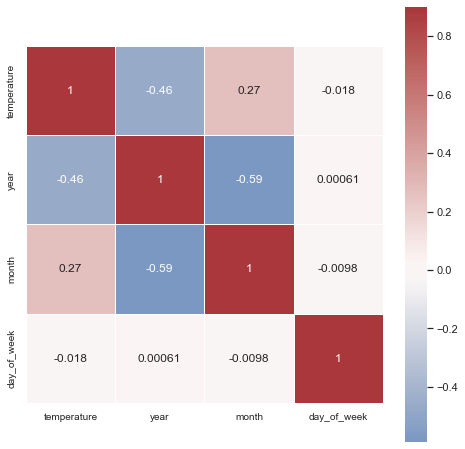

In [8]:
# Get Correlation Matrix
corrmat = df_weather.corr()
corrmat
plt.rcParams["figure.figsize"] = (8,8)
sns. set(font_scale=1)
x = sns.heatmap(corrmat, annot=True,  cmap='vlag', center = 0,  vmax=.9, square=True, linewidths=1)
x.tick_params(labelsize=10)

### Feature Frequency Distributions

In [9]:
df_weather.columns

Index(['timestamp', 'temperature', 'description', 'year', 'month',
       'day_of_week'],
      dtype='object')

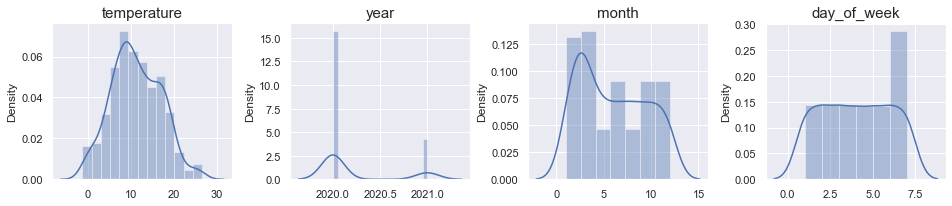

In [10]:
list = ['temperature',  'year', 'month',
       'day_of_week']

plt.rcParams["figure.figsize"] = (20,8)

df_forplot = df_weather.loc[:,df_weather.select_dtypes(include = ['int', 'float']).columns]

i=0
for var in list:
    i=i+1
    plt.subplot(3,6,i)
    sns.distplot(df_forplot[[var]])
    plt.title(var, fontdict = {'fontsize':15})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [11]:
df_weather.describe()

,temperature,year,month,day_of_week
count,425.000000,425.000000,425.000000,425.000000
mean,11.286118,2020.211765,5.960000,3.997647
std,5.699741,0.409040,3.496062,2.006474
min,-1.200000,2020.000000,1.000000,1.000000
25%,7.300000,2020.000000,3.000000,2.000000
50%,10.700000,2020.000000,6.000000,4.000000
75%,15.700000,2020.000000,9.000000,6.000000
max,26.600000,2021.000000,12.000000,7.000000


### Relationship of Temp by dates

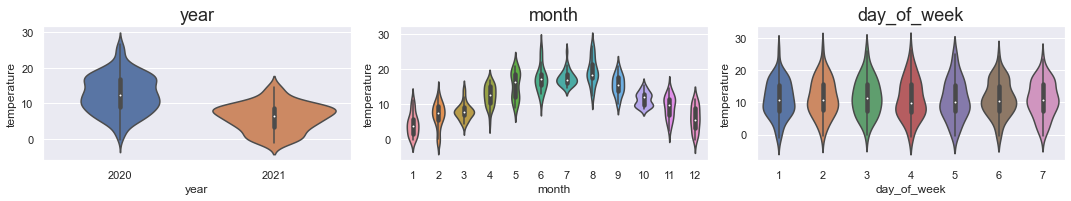

In [12]:
list = ['year', 'month', 'day_of_week']
plt.rcParams["figure.figsize"] = (20,5)

i=0
for var2 in ['temperature']:
    for var in list:
        i=i+1
        plt.subplot(2,4,i)
        sns.violinplot(data=df_weather, x=var, y=var2)
        plt.title(var, fontdict = {'fontsize':18})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

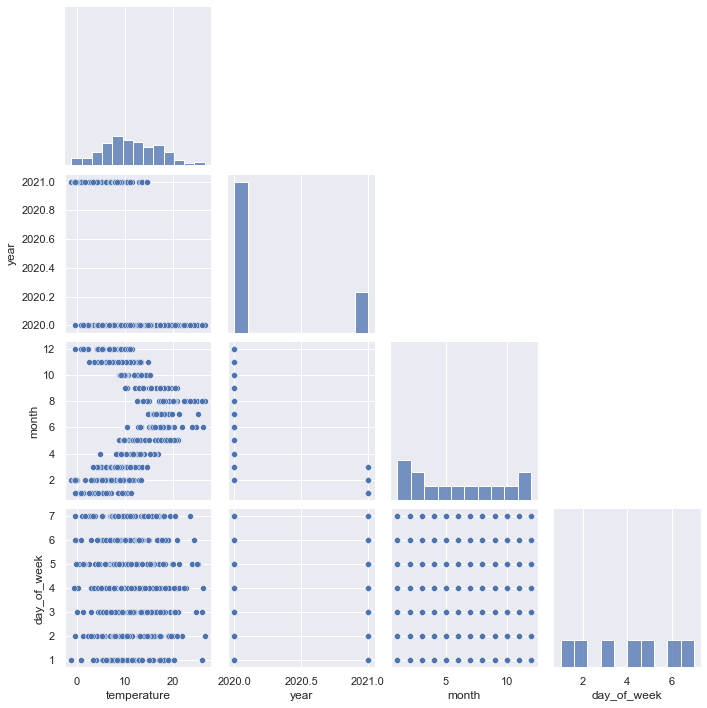

In [13]:
sns.pairplot(df_weather, corner = True)

### Weather description

In [14]:
df_weather.description.unique()

array(['Passing clouds', 'Partly sunny', 'Clear', 'Fog', 'Sunny',
       'Light rain. Mostly cloudy', 'Broken clouds',
       'Light rain. Broken clouds', 'Drizzle. Partly sunny',
       'Scattered clouds', 'Overcast', 'Light rain. Partly sunny',
       'Partly cloudy', 'Low clouds', 'Ice fog', 'Drizzle. Low clouds',
       'Light snow. Partly sunny'], dtype=object)

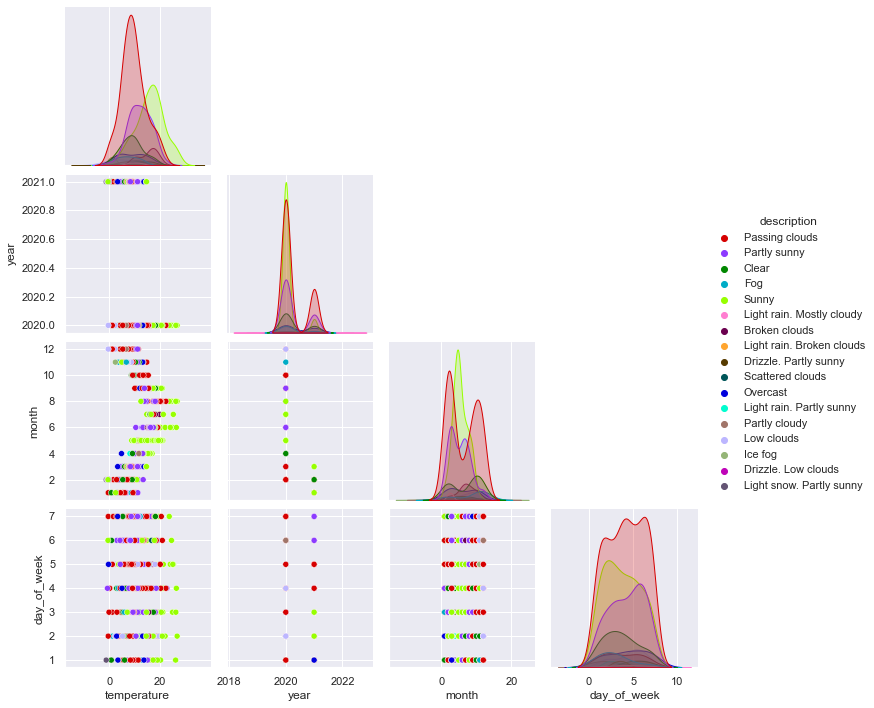

In [15]:
palette = sns.color_palette(cc.glasbey, n_colors=17)
sns.pairplot(df_weather, 
             hue = 'description', palette= palette, corner = True)
plt.show()

## Lower temp

In [16]:
df_weather[df_weather['temperature']<3]

,timestamp,temperature,description,year,month,day_of_week
5,2020-02-06,2.9,Clear,2020,2,4
300,2020-11-27,2.4,Ice fog,2020,11,5
309,2020-12-06,2.2,Passing clouds,2020,12,7
310,2020-12-07,0.9,Fog,2020,12,1
311,2020-12-08,1.3,Fog,2020,12,2
328,2020-12-25,1.6,Passing clouds,2020,12,5
331,2020-12-28,0.8,Passing clouds,2020,12,1
332,2020-12-29,2.3,Low clouds,2020,12,2
333,2020-12-30,1.2,Passing clouds,2020,12,3
334,2020-12-31,-0.4,Low clouds,2020,12,4
